# Import Libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

# Preprocessing Data

In [154]:
london_crime_by_lsoa = pd.read_csv("london_crime_by_lsoa.csv")

In [155]:
london_crime_by_lsoa.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [156]:
london_crime_by_lsoa.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [139]:
london_crime_by_lsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [157]:
london_crime_by_lsoa.shape

(13490604, 7)

In [159]:
print("Jumlah borough yang tercatat:", london_crime_by_lsoa["borough"].nunique())
print(london_crime_by_lsoa["borough"].unique())

Jumlah borough yang tercatat: 33
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


In [160]:
print("Jumlah kriminal kategori mayor yang tercatat:", london_crime_by_lsoa["major_category"].nunique())
print(london_crime_by_lsoa["major_category"].unique())

Jumlah kriminal kategori mayor yang tercatat: 9
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [161]:
london_crime_by_lsoa.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [162]:
missing_values = london_crime_by_lsoa.isnull().sum()

In [163]:
print("Kolom dengan nilai-nilai yang hilang:")
print(missing_values[missing_values > 0])

Kolom dengan nilai-nilai yang hilang:
Series([], dtype: int64)


## Area Plot

**wilayah yang memiliki angka kejahatan yang paling kecil selama tahun 2008-2016?**

In [188]:
least7_crime = london_crime_by_lsoa.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
least7_crime = least7_crime.set_index("year").groupby("borough").sum()
least7_crime = least7_crime.sort_values(by="value", ascending=True).head(7)
least7_crime

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136
Merton,115654
Harrow,116848


In [189]:
df_least7 = london_crime_by_lsoa.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_least7 = df_least7.loc[least7_crime.index]
df_least7 = pd.pivot_table(df_least7, values="value", aggfunc=np.sum, index="year", columns="borough")
df_least7

borough,Bexley,City of London,Harrow,Kingston upon Thames,Merton,Richmond upon Thames,Sutton
year,,,,,,,
2008,15305,0,13774,10661,13875,11106,12943
2009,14445,0,13948,10163,13561,10618,12240
2010,13166,0,13945,10171,13595,10601,12032
2011,11325,69,12801,10155,13548,10896,11068
2012,11669,157,12803,9956,12856,11168,10948
2013,11552,110,11914,9191,11595,10439,10057
2014,11844,115,11909,9288,11596,10456,10443
2015,11990,151,12601,9738,12273,10413,10598
2016,12840,178,13153,9983,12755,11074,10658


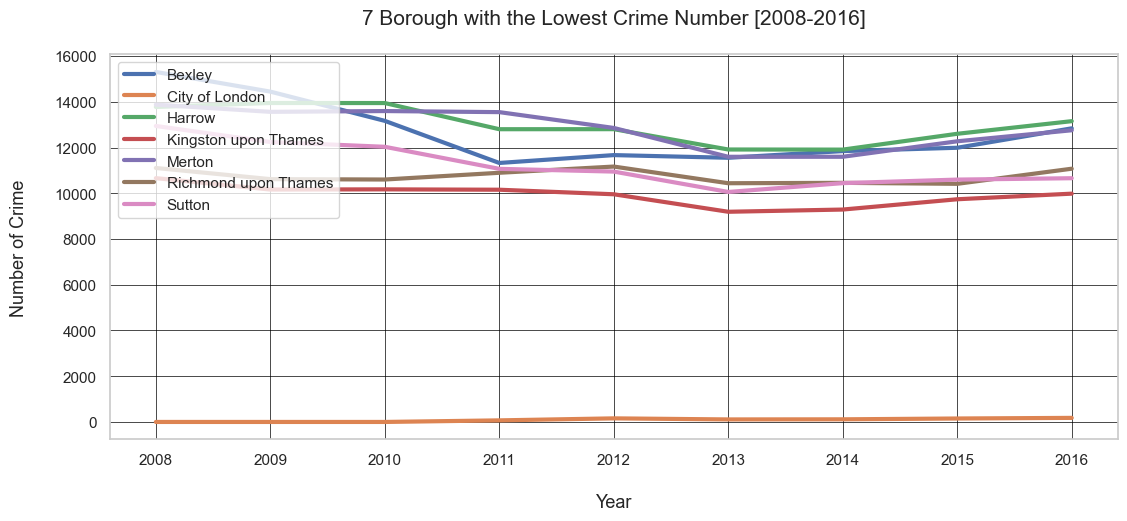

In [210]:
df_least7.plot(kind="line",
             figsize=(13,5),
            linewidth=3)
plt.title("7 Borough with the Lowest Crime Number [2008-2016]\n", fontsize=15)
plt.xlabel("\nYear", fontsize=13)
plt.ylabel("Number of Crime\n", fontsize=13)
plt.grid(color="black", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

pada grafik diatas dapat dilihat bahwa wilayah yang memiliki angka kejahatan yang paling kecil selama tahun 2008-2016 yaitu city of london yang memiliki 778 kejahatan dibanding dengan wilayah lain.

**wilayah yang memiliki angka kejahatan yang paling besar selama tahun 2008-2016?**

In [187]:
top7_crime = london_crime_by_lsoa.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
top7_crime = top7_crime.set_index("year").groupby("borough").sum()
top7_crime = top7_crime.sort_values(by="value", ascending=False).head(7)
top7_crime

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562


In [192]:
df_top7 = london_crime_by_lsoa.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_top7 = df_top7.loc[top7_crime.index]
df_top7 = pd.pivot_table(df_top7, values="value", aggfunc=np.sum, index="year", columns="borough")
df_top7

borough,Camden,Croydon,Ealing,Lambeth,Newham,Southwark,Westminster
year,,,,,,,
2008,32010,29516,28947,31717,29752,33470,47846
2009,31612,29784,28617,31225,28610,30623,48456
2010,31804,29373,31360,31671,30728,31320,48116
2011,33956,29830,29537,33224,27978,30723,54243
2012,31472,30189,28832,33473,30067,30737,59226
2013,28435,27444,25917,31868,27577,31128,53852
2014,27198,27357,24978,31765,28005,28912,47564
2015,29477,28089,26247,33164,29217,30260,47395
2016,29183,28712,27127,34071,30090,31636,48330


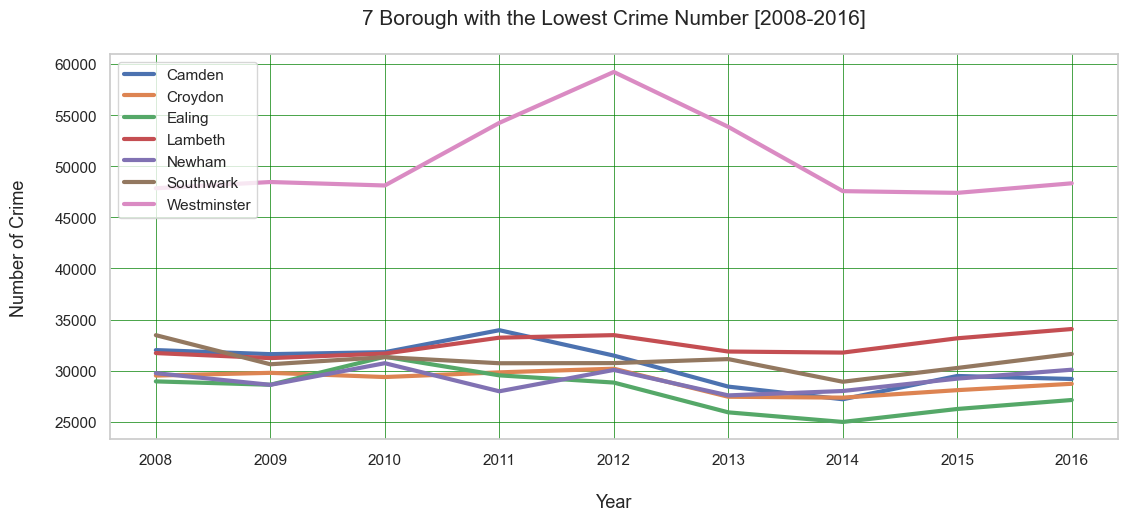

In [207]:
df_top7.plot(kind="line",
             figsize=(13,5),
            linewidth=3)
plt.title("7 Borough with the Lowest Crime Number [2008-2016]\n", fontsize=15)
plt.xlabel("\nYear", fontsize=13)
plt.ylabel("Number of Crime\n", fontsize=13)
plt.grid(color="green", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

pada grafik diatas dapat dilihat bahwa wilayah yang memiliki angka kejahatan yang paling besar selama tahun 2008-2016 yaitu westminster yang memiliki 455028 kejahatan dibanding dengan wilayah lain.

## Histogram

**Seperti apa distribusi frekuensi jumlah kejahatan pada tiap bulannya?**

In [211]:
month_frequency = london_crime_by_lsoa.drop(["lsoa_code","borough","major_category","minor_category","year"], axis=1)
month_frequency = month_frequency.groupby("month").sum()
month_frequency

,value
month,
1,530247
2,500537
3,551795
4,520648
5,552704
6,549041
7,563076
8,532784
9,522377


In [200]:
count, bin_edges = np.histogram(month_frequency)
print(count)
print(bin_edges)

[1 0 1 2 1 1 0 2 2 2]
[500537.  506790.9 513044.8 519298.7 525552.6 531806.5 538060.4 544314.3
 550568.2 556822.1 563076. ]


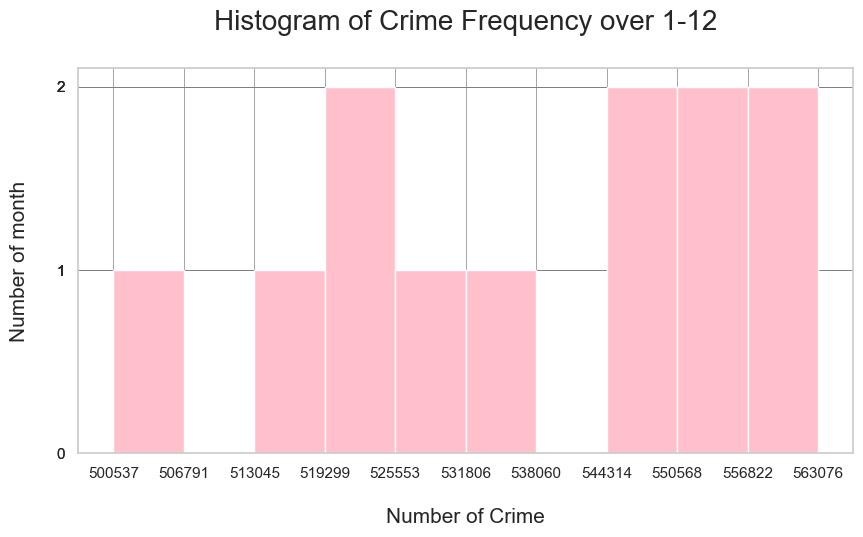

In [212]:
month_frequency.plot(kind="hist",
                     figsize=(10,5),
                     xticks=bin_edges,
                     yticks=count,
                     legend=False,
                     color="pink")
plt.title("Histogram of Crime Frequency over 1-12\n", fontsize=20)
plt.xlabel("\nNumber of Crime", fontsize=15)
plt.ylabel("Number of month\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Pada output diatas dapat dilihat bahwa total kejahatan terendah sampai tertinggi telah diurutkan sehingga jumlah tertingginya berada di bulan ke 7 dengan angka 563076 dan terendah berada di bulan 2 dengan angka 500537

In [120]:
dd

## Bar Chart

**berapa jumlah kejahatan di london berdasarkan kategori minor tahun 2008-2016?**

In [213]:
totalCrimeEachType = london_crime_by_lsoa.drop(["lsoa_code","borough","major_category","year","month"], axis=1).groupby("minor_category").sum()
totalCrimeEachType["value"].to_numpy()
totalCrimeEachType

,value
minor_category,
Assault with Injury,451001
Burglary in Other Buildings,263011
Burglary in a Dwelling,491282
Business Property,21295
Common Assault,413690
Counted per Victim,3840
Criminal Damage To Dwelling,154116
Criminal Damage To Motor Vehicle,265463
Criminal Damage To Other Building,66003


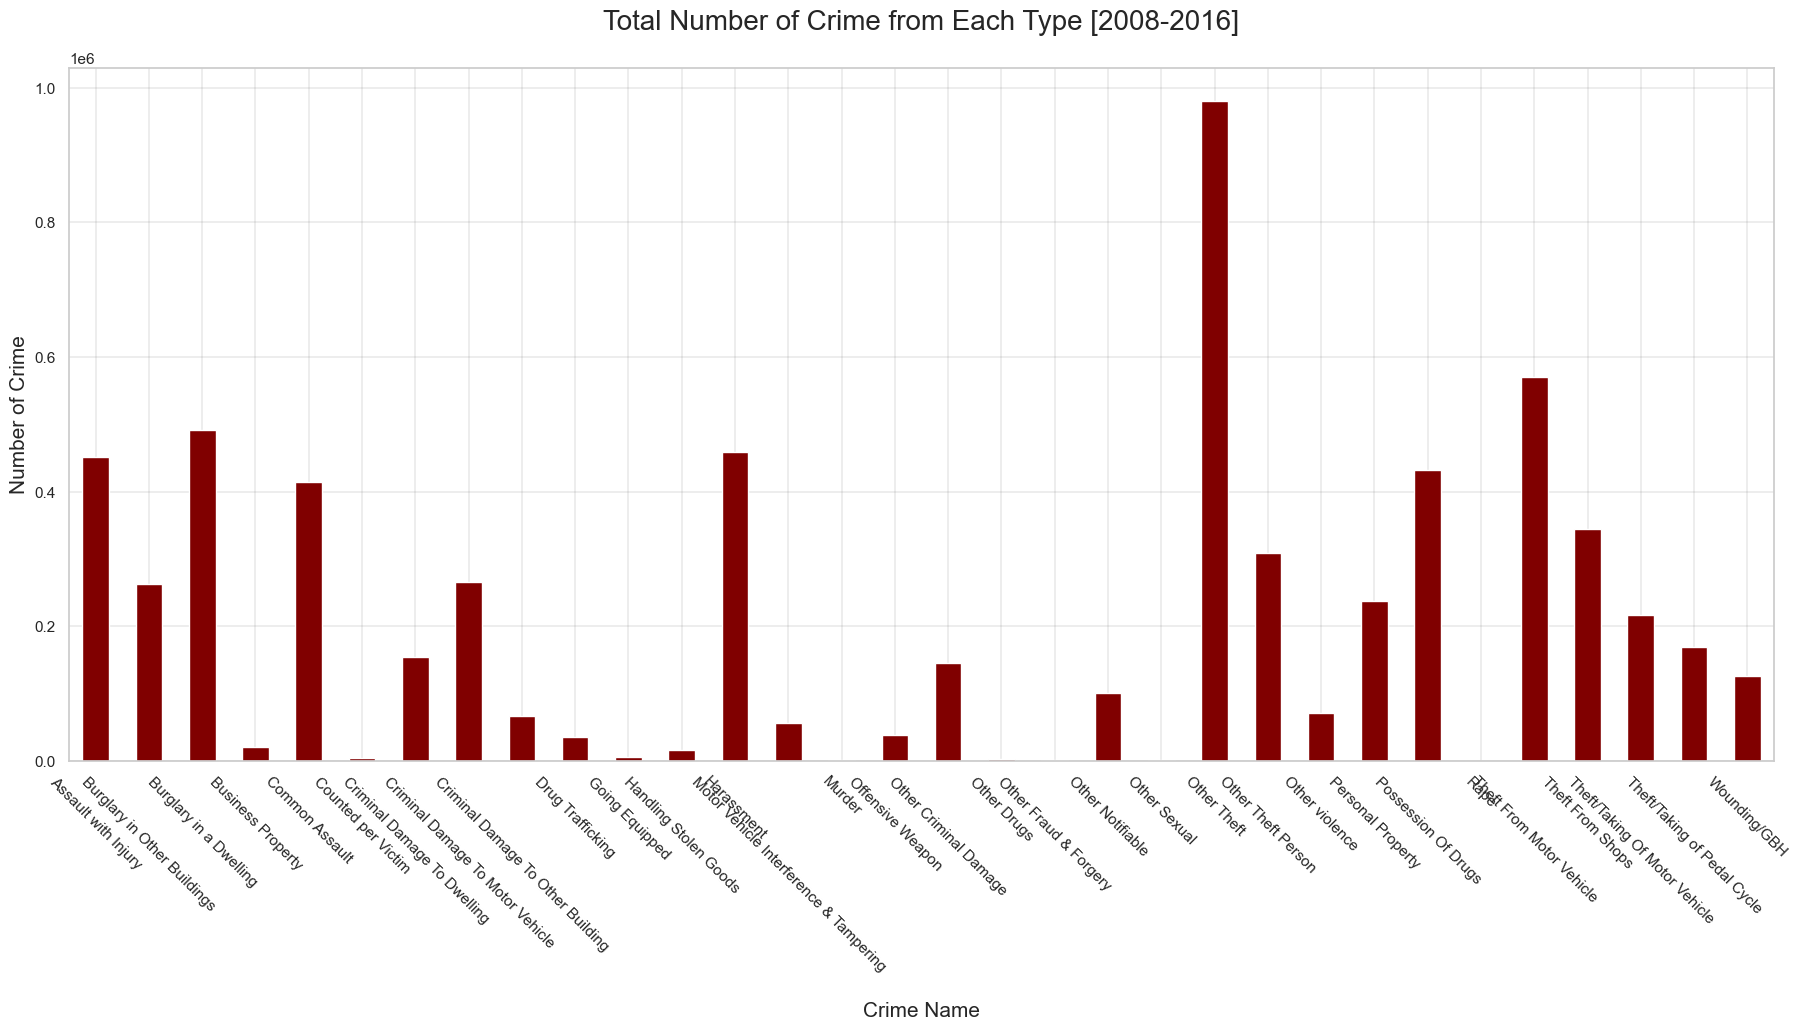

In [218]:
totalCrimeEachType.plot(kind="bar",
                        figsize=(22,9),
                        legend=False,
                        color="maroon")
plt.title("Total Number of Crime from Each Type [2008-2016]\n", fontsize=20)
plt.xlabel("\nCrime Name", fontsize=15)
plt.ylabel("Number of Crime", fontsize=15)
plt.xticks(rotation=-45)
plt.yticks(fontsize=11)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Pada output diatas dapat dilihat bahwa other theft memiliki balok paling tinggi daripada yang lain yang menandakan bahwa kategori kejahatan ringan yang paling sering dilakukan yaitu other theft

## Pie Chart

**Seperti apa proporsi kejahatan yang terjadi di wilayah brent dari tahun 2008-2016 berdasarkan kategori major**

In [223]:
redbridge_crime_proportion = london_crime_by_lsoa.drop(["lsoa_code","minor_category","year","month"], axis=1).set_index("borough")
redbridge_crime_proportion = redbridge_crime_proportion.loc["Brent"]
redbridge_crime_proportion = redbridge_crime_proportion.groupby("major_category").size()
redbridge_crime_proportion

major_category
Burglary                        37368
Criminal Damage                 73440
Drugs                           46980
Fraud or Forgery                 9288
Other Notifiable Offences       28728
Robbery                         34128
Sexual Offences                  3564
Theft and Handling             141156
Violence Against the Person    115992
dtype: int64

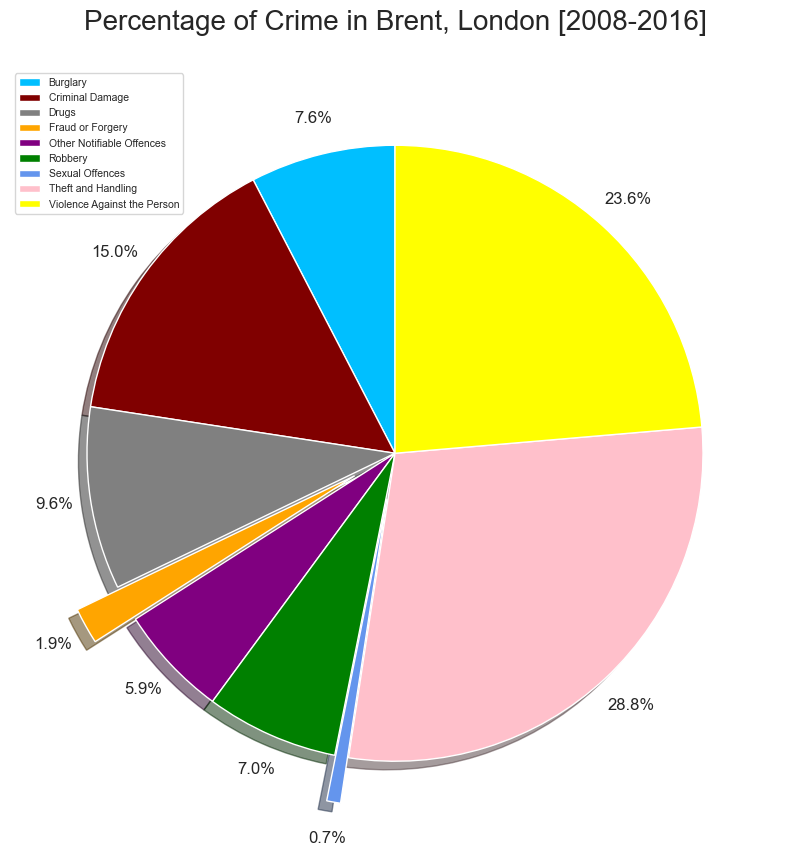

In [239]:
explode_list = [0,0,0,0.15,0,0,0.15,0,0]
color_list = ["deepskyblue","maroon","grey","orange","purple",
             "green","cornflowerblue","pink","yellow"]
redbridge_crime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     colors=color_list,
                    explode = explode_list,
                               subplots=True)
plt.title("Percentage of Crime in Brent, London [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=redbridge_crime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

pada output di atas dapat dilihat bahwa pada kategori kejahatan di Brent pada tahun 2008-2016 yang memiliki presentase tertinggi yaitu theft and handling sebesar 28.8% dan sexual offences adalah yang terendah dengan presentase 0.7%.

## Box Plot

**Seperti apa distribusi statistik data kasus kejahatan yang terjadi di wilayah masing-masing dari tahun 2008-2016**

In [240]:
crime_frequency = london_crime_by_lsoa.drop(["lsoa_code","major_category","minor_category","month","year"], axis=1)
crime_frequency = crime_frequency.groupby("borough").sum()
crime_frequency

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [241]:
crime_frequency.describe()

,value
count,33.000000
mean,195386.606061
std,79148.057551
min,780.000000
25%,149447.000000
50%,203879.000000
75%,228613.000000
max,455028.000000


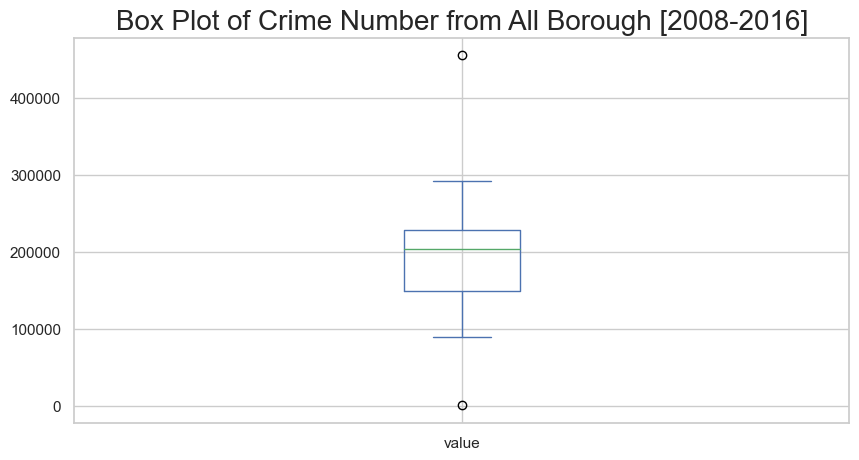

In [242]:
crime_frequency.plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Crime Number from All Borough [2008-2016]", fontsize=20)
plt.show()

pada output di atas dapat dilihat bahwa ada 2 wilayah yang lebih besar atau kecil dari yang lain yang di tandai dengan adanya outlier. juga diketahui bahwa wilayah yang memiliki jumlah kejahatan paling rendah yaitu city of london dan westminster adalah yang tertinggi.

## Scatter Plot

**Ketika bulan apakah kejahatan di london mencapai angka terendah selama tahun 2008-2016?**

In [243]:
month_crime = london_crime_by_lsoa.drop(["lsoa_code","borough","major_category","minor_category","year"], axis=1)
month_crime = month_crime.groupby("month").sum()
month_crime = month_crime.reset_index()
month_crime

,month,value
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


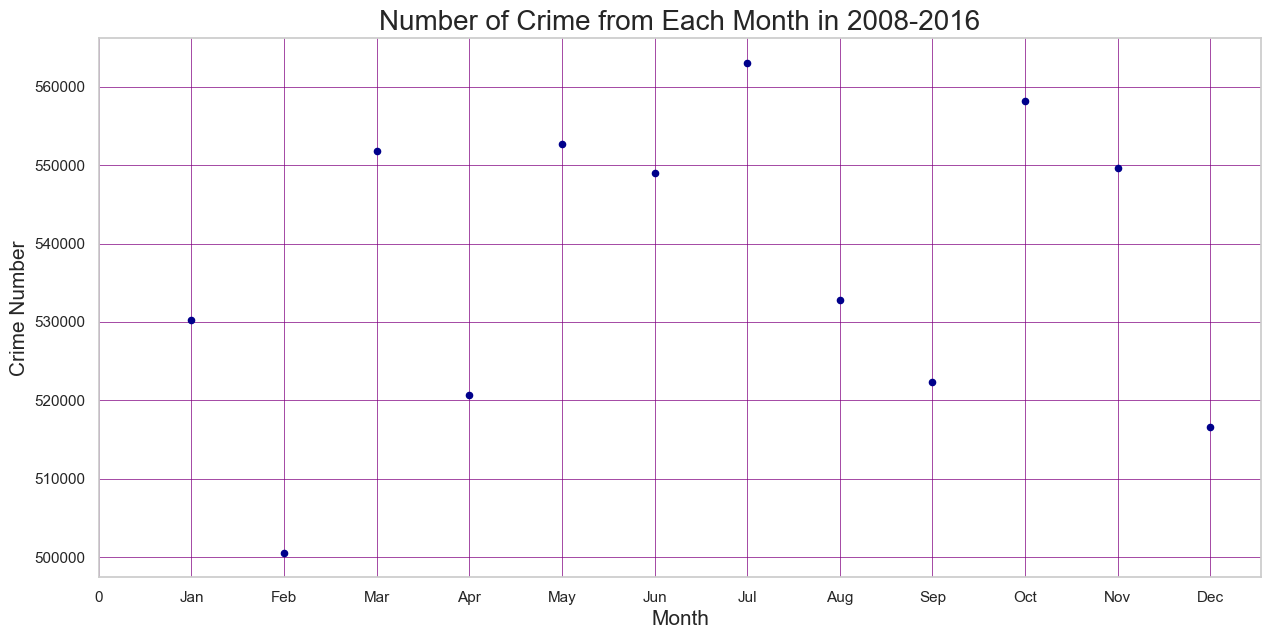

In [244]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime.plot(kind="scatter", x="month",y="value",figsize=(15,7), color="darkblue")
plt.title("Number of Crime from Each Month in 2008-2016", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="purple", linewidth=0.5)
plt.show()

Pada output di atas dapat dilihat bahwa pada bulan juli adalah kasus kejahatan tertinggi sedangkan terendah berada di bulan februari

### Juga dapat melihat di tahun 2012, bulan apa dengan jumlah kasus kejahatan di london mencapai angka tertinggi

In [246]:
london_crime_by_lsoa

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [248]:
month_crime2012 = london_crime_by_lsoa.drop(["lsoa_code","borough","major_category","minor_category"], axis=1).set_index("year")
month_crime2012 = month_crime2012.loc[2012]
month_crime2012 = month_crime2012.reset_index().drop("year", axis=1)
month_crime2012 = month_crime2012.groupby("month").sum()
month_crime2012 = month_crime2012.reset_index()
month_crime2012

,month,value
0,1,62436
1,2,56735
2,3,67537
3,4,58801
4,5,64344
5,6,62281
6,7,63280
7,8,62143
8,9,56912
9,10,61728


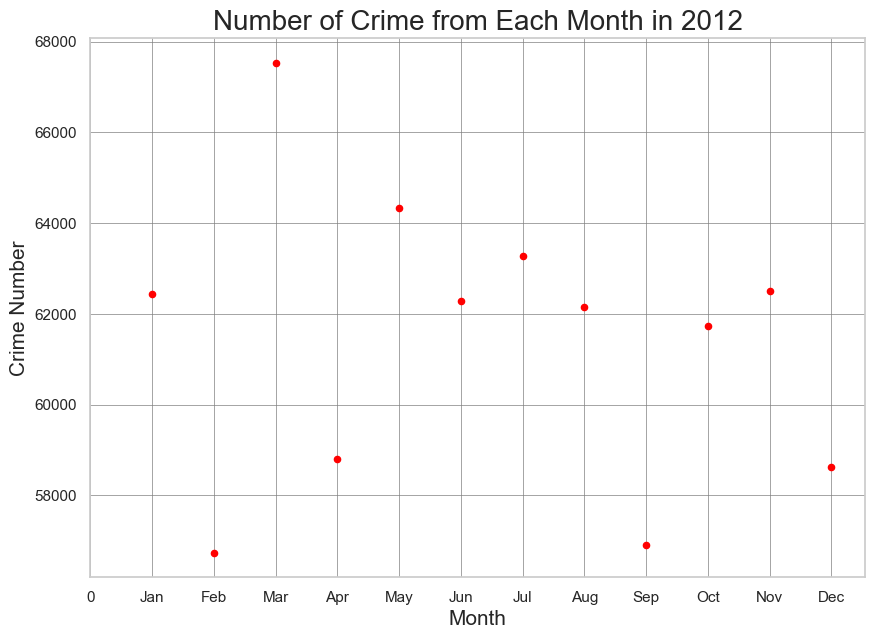

In [251]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime2012.plot(kind="scatter", x="month",y="value",figsize=(10,7), color="red")
plt.title("Number of Crime from Each Month in 2012", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Pada output diatas dapat dilihat bahwa pada tahun 2012, jumlah kejahatan paling tinggi atau sering terjadi di bulan maret dan pada bulan februari adalah bulan dengan jumlah kejahatan terendah atau jarang terjadi

## Follium Maps

In [252]:
#Peta London
m = folium.Map(location=[51.507351, -0.127758], zoom_start=15)
m